In [ ]:
import pandas as pd
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#connect notebook to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read in Data from Kaggle: Every NFL game from 2022-2023
gd=pd.read_csv('drive/My Drive/nfl_team_stats_2002-2023.csv')
gd

,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-05,49ers,Giants,16,13,13,21,4,...,0,6,0,0,1,3,0,0,27:32,32:28
1,2002,1,2002-09-08,Jets,Bills,37,31,18,26,2,...,0,8,1,1,0,2,2,0,21:06,39:08
2,2002,1,2002-09-08,Vikings,Bears,23,27,19,20,5,...,0,6,1,1,2,1,0,0,31:31,28:29
3,2002,1,2002-09-08,Chargers,Bengals,34,6,27,13,6,...,0,5,0,0,0,1,0,0,37:48,22:12
4,2002,1,2002-09-08,Chiefs,Browns,40,39,24,24,5,...,0,10,0,1,1,0,0,0,30:16,29:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5924,2023,Division,2024-01-21,Buccaneers,Lions,23,31,23,26,4,...,3,4,0,0,2,0,0,0,28:00,32:00
5925,2023,Division,2024-01-21,Chiefs,Bills,27,24,21,27,1,...,3,4,1,0,0,0,0,0,22:57,37:03
5926,2023,Conference,2024-01-28,Chiefs,Ravens,17,10,22,16,8,...,0,1,0,2,0,1,0,0,37:30,22:30
5927,2023,Conference,2024-01-28,Lions,49ers,31,34,28,23,6,...,4,5,1,0,0,1,0,0,27:48,32:12


In [ ]:
gd.columns

Index(['season', 'week', 'date', 'away', 'home', 'score_away', 'score_home',
       'first_downs_away', 'first_downs_home', 'third_down_comp_away',
       'third_down_att_away', 'third_down_comp_home', 'third_down_att_home',
       'fourth_down_comp_away', 'fourth_down_att_away',
       'fourth_down_comp_home', 'fourth_down_att_home', 'plays_away',
       'plays_home', 'drives_away', 'drives_home', 'yards_away', 'yards_home',
       'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'pass_comp_home',
       'pass_att_home', 'pass_yards_home', 'sacks_num_away',
       'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home',
       'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home',
       'pen_num_away', 'pen_yards_away', 'pen_num_home', 'pen_yards_home',
       'redzone_comp_away', 'redzone_att_away', 'redzone_comp_home',
       'redzone_att_home', 'fumbles_away', 'fumbles_home',
       'interceptions_away', 'interceptions_home', 'def_st_td_away',
       'def_st

In [ ]:
#Read in Chris Jones Stats from Excel: 2023 Season Stats
CJ=pd.read_excel('drive/My Drive/CJ and 49er_Oline_Stats.xlsx',sheet_name=2)
CJ


,Year,Age,Team,Position,Number,Games,Games Started,Int,Yds,TD,...,TD.1,Sacks,Combined,Solo,Ast,TFL,QBHits,Sfty,AV,Awards
0,2023*+,29,KAN,DT,95,16,16,0,0,0,...,0,10.5,30,20,10,13,29,NaN,18,AP1 PB


In [ ]:
CJ.columns

Index(['Year', 'Age', 'Team', 'Position', 'Number', 'Games', 'Games Started',
       'Int', 'Yds', 'TD', 'Lng', 'PD', 'FF', 'Fumbles', 'FR', 'Yds.1', 'TD.1',
       'Sacks', 'Combined', 'Solo', 'Ast', 'TFL', 'QBHits', 'Sfty', 'AV',
       'Awards'],
      dtype='object')

In [ ]:
#Read in 49ers Interior Oline Stats from Excel: 2023 Penalty Stats
Oline=pd.read_excel('drive/My Drive/CJ and 49er_Oline_Stats.xlsx',sheet_name=5)
Oline

,Player,Year,Age,Team,Position,No.,G,GS,Holding,False Start,Decl/Offs,All Pen.
0,Spencer Burford,2023.0,24.0,SFO,OL,74.0,14,13,3,3,0,8
1,Aaron Banks,2023.0,26.0,SFO,OL,65.0,15,14,1,4,1,6
2,Jake Brendel,2023.0,31.0,SFO,OL,64.0,17,17,0,1,0,1
3,Total,NaN,NaN,NaN,NaN,NaN,46,44,4,8,1,15


In [ ]:
Oline.columns

Index(['Player', 'Year', 'Age', 'Team', 'Position', 'No.', 'G', 'GS',
       'Holding', 'False Start', 'Decl/Offs', 'All Pen.'],
      dtype='object')

In [ ]:
#Broke data into 4 dataframes. Chiefs Home, Chiefs Away, 49ers Home, 49ers Away
kcdfa= gd[gd.away== 'Chiefs']
kcdfh=gd[gd.home== 'Chiefs']
Sfdfa=gd[gd.away== '49ers']
Sfdfh= gd[gd.home== '49ers']

#Combined Cheifs home and away game data
Chiefs_df=pd.concat([kcdfa,kcdfh], axis=0)

Chiefs_df= Chiefs_df.reset_index(drop=True)
#Combined 49ers home and away game data
SanFran_df=pd.concat([Sfdfa,Sfdfh], axis=0)

SanFran_df= SanFran_df.reset_index(drop=True)
#Combined both 49ers and Cheifs Home and Away games on one dataframe
combined_df= pd.concat([kcdfa,kcdfh, Sfdfa,Sfdfh], axis=0)
combined_df= combined_df.reset_index(drop=True)
#Outputs every Chiefs and 49ers Home and Away Game from Orginal dataset
combined_df


,season,week,date,away,home,score_away,score_home,first_downs_away,first_downs_home,third_down_comp_away,...,redzone_comp_home,redzone_att_home,fumbles_away,fumbles_home,interceptions_away,interceptions_home,def_st_td_away,def_st_td_home,possession_away,possession_home
0,2002,1,2002-09-08,Chiefs,Browns,40,39,24,24,5,...,0,10,0,1,1,0,0,0,30:16,29:44
1,2002,3,2002-09-22,Chiefs,Patriots,38,41,21,27,6,...,0,8,1,0,2,1,0,0,27:01,37:39
2,2002,5,2002-10-06,Chiefs,Jets,29,25,24,23,5,...,0,6,0,0,1,1,0,0,30:59,29:01
3,2002,6,2002-10-13,Chiefs,Chargers,34,35,17,27,4,...,0,12,0,3,2,2,0,0,29:32,30:28
4,2002,10,2002-11-10,Chiefs,49ers,13,17,14,22,4,...,0,6,0,0,0,1,0,0,21:26,38:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2023,14,2023-12-10,Seahawks,49ers,16,28,17,19,2,...,2,2,0,1,2,1,0,0,30:45,29:15
754,2023,16,2023-12-25,Ravens,49ers,33,19,23,21,4,...,2,4,0,0,0,5,0,0,31:14,28:46
755,2023,18,2024-01-07,Rams,49ers,21,20,19,20,9,...,3,3,0,1,1,0,0,0,31:00,29:00
756,2023,Division,2024-01-20,Packers,49ers,21,24,20,19,7,...,1,1,0,0,2,0,0,0,30:19,29:41


In [ ]:
#By using the combined data frame of all Chiefs and 49ers home and away games cleaned to only 2023 season

kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCA = kcdfa[(selected_date < kcdfa['date']) & (kcdfa['date'] < selected_date_2)]
#Outputs every Chiefs Away game from 2023 season except the Super Bowl
print(filtered_dates_KCA)

kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCH = kcdfh[(selected_date < kcdfh['date']) & (kcdfh['date'] < selected_date_2)]
#Outputs every Chiefs Home game from 2023 season except the Super Bowl
print(filtered_dates_KCH)

Sfdfa['date'] = Sfdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFA = Sfdfa[(selected_date < Sfdfa['date']) & (Sfdfa['date'] < selected_date_2)]
#Outputs every 49ers Away game from 2023 season except the Super Bowl
print(filtered_dates_SFA)

Sfdfh['date'] = Sfdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFH = Sfdfh[(selected_date < Sfdfh['date']) & (Sfdfh['date'] < selected_date_2)]
#Outputs every 49ers Away game from 2023 season except the Super Bowl
print(filtered_dates_SFH)

      season        week       date    away      home  score_away  score_home  \
5667    2023           2 2023-09-17  Chiefs   Jaguars          17           9   
5706    2023           4 2023-10-01  Chiefs      Jets          23          20   
5719    2023           5 2023-10-08  Chiefs   Vikings          27          20   
5762    2023           8 2023-10-29  Chiefs   Broncos           9          24   
5820    2023          12 2023-11-26  Chiefs   Raiders          31          17   
5835    2023          13 2023-12-03  Chiefs   Packers          19          27   
5860    2023          15 2023-12-17  Chiefs  Patriots          27          17   
5912    2023          18 2024-01-07  Chiefs  Chargers          13          12   
5925    2023    Division 2024-01-21  Chiefs     Bills          27          24   
5926    2023  Conference 2024-01-28  Chiefs    Ravens          17          10   

      first_downs_away  first_downs_home  third_down_comp_away  ...  \
5667                19               

<ipython-input-12-2e54d1727d3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-12-2e54d1727d3e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-12-2e54d1727d3e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

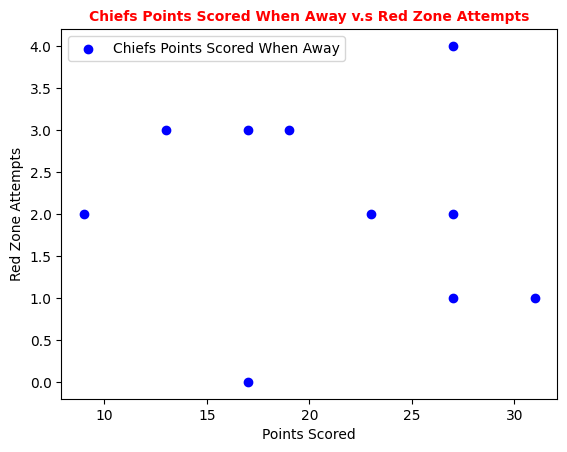

In [ ]:
#Plotted Chiefs points scored during an Away game compared to Redzone attempts as a scatterplot
plt.scatter(filtered_dates_KCA['score_away'],filtered_dates_KCH['redzone_att_away'],color='blue',label='Chiefs Points Scored When Away')

plt.xlabel('Points Scored')
plt.ylabel('Red Zone Attempts')
plt.legend()
plt.title('Chiefs Points Scored When Away v.s Red Zone Attempts', fontsize=10, fontweight='bold', color='red')

plt.show()

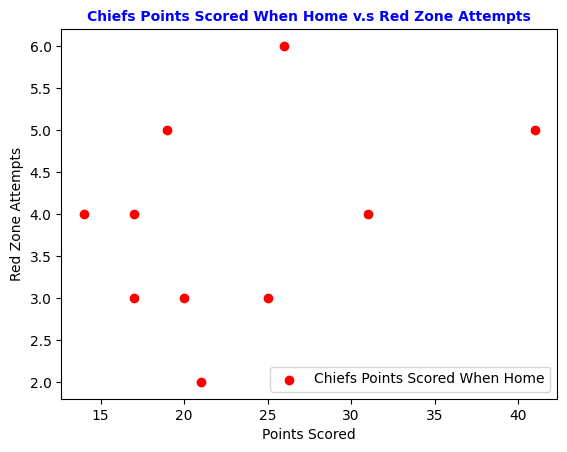

In [ ]:
#Plotted Chiefs points scored during an Home game compared to Redzone attempts as a scatterplot
plt.scatter(filtered_dates_KCH['score_home'],filtered_dates_KCH['redzone_att_home'],color='red',label='Chiefs Points Scored When Home')

plt.xlabel('Points Scored')
plt.ylabel('Red Zone Attempts')
plt.legend()
plt.title('Chiefs Points Scored When Home v.s Red Zone Attempts', fontsize=10, fontweight='bold', color='blue')

plt.show()

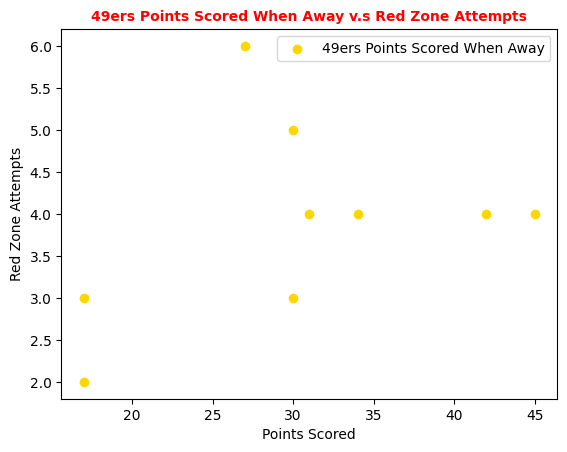

In [ ]:
#Plotted 49ers points scored during an Away game compared to Redzone attempts as a scatterplot
plt.scatter(filtered_dates_SFA['score_away'],filtered_dates_SFA['redzone_att_away'],color='gold',label='49ers Points Scored When Away')

plt.xlabel('Points Scored')
plt.ylabel('Red Zone Attempts')
plt.legend()
plt.title('49ers Points Scored When Away v.s Red Zone Attempts', fontsize=10, fontweight='bold', color='red')

plt.show()

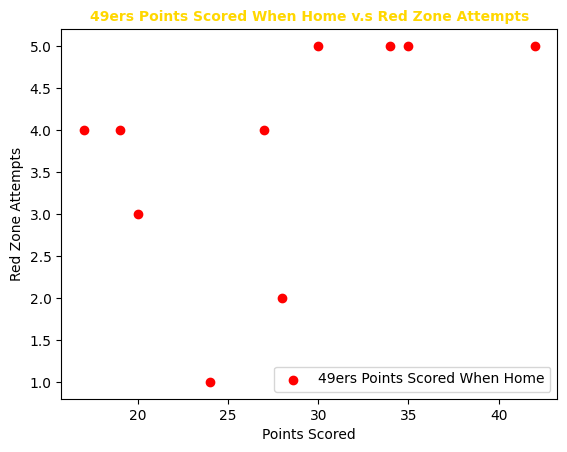

In [ ]:
#Plotted 49ers points scored during an Home game compared to Redzone attempts as a scatterplot
plt.scatter(filtered_dates_SFH['score_home'],filtered_dates_SFH['redzone_att_home'],color='red',label='49ers Points Scored When Home')

plt.xlabel('Points Scored')
plt.ylabel('Red Zone Attempts')
plt.legend()
plt.title('49ers Points Scored When Home v.s Red Zone Attempts', fontsize=10, fontweight='bold', color='gold')

plt.show()

<ipython-input-17-3ba138ca4cc0>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_turnovers_away= combined_df_away.groupby('away')['fumbles_away', 'interceptions_away'].sum().sum(axis=1)


Text(0, 0.5, 'Turnovers')

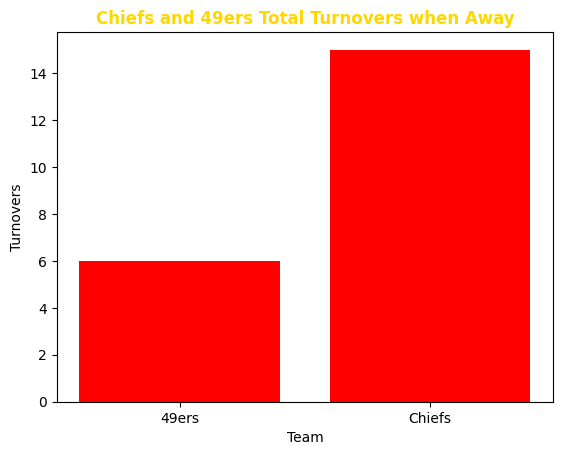

In [ ]:
#Created a dataframe with only Chiefs and 49ers away games from 2023 season
combined_df_away= pd.concat([filtered_dates_KCA,filtered_dates_SFA], ignore_index=True)

#Added total fumbles and interceptions of each game to calcuate total turnovers for each team
team_turnovers_away= combined_df_away.groupby('away')['fumbles_away', 'interceptions_away'].sum().sum(axis=1)

#Made a bar graph to show total turnovers from Chiefs and 49ers during Away games
plt.bar(team_turnovers_away.index, team_turnovers_away.values, color='red')

plt.title('Chiefs and 49ers Total Turnovers when Away', fontsize=12, fontweight='bold', color='gold')
plt.xlabel('Team')
plt.ylabel('Turnovers')


<ipython-input-18-5e35d7cbc445>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_turnovers_home= combined_df_home.groupby('home')['fumbles_home', 'interceptions_home'].sum().sum(axis=1)


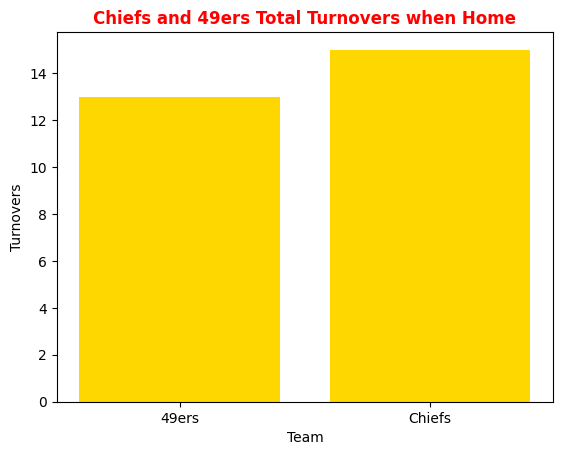

In [ ]:
#Created a dataframe with only Chiefs and 49ers home games from 2023 season
combined_df_home= pd.concat([filtered_dates_KCH,filtered_dates_SFH], ignore_index=True)

#Added total fumbles and interceptions of each game to calcuate total turnovers for each team
team_turnovers_home= combined_df_home.groupby('home')['fumbles_home', 'interceptions_home'].sum().sum(axis=1)

#Made a bar graph to show total turnovers from Chiefs and 49ers during Home games
plt.bar(team_turnovers_home.index, team_turnovers_home.values, color='gold')

plt.title('Chiefs and 49ers Total Turnovers when Home', fontsize=12, fontweight='bold', color='red')
plt.xlabel('Team')
plt.ylabel('Turnovers')

plt.show()

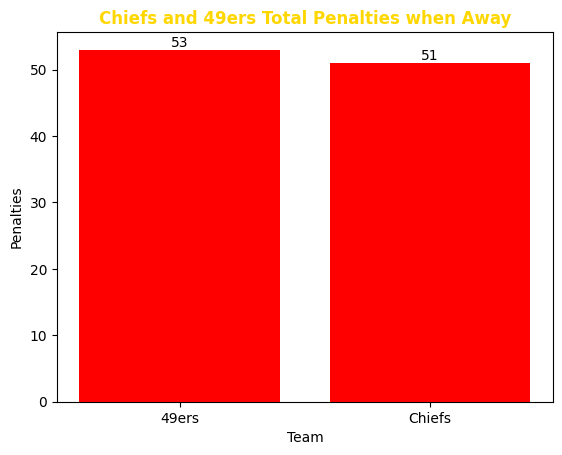

In [ ]:
#Created a dataframe with only Chiefs and 49ers away games from 2023 season
combined_df_away= pd.concat([filtered_dates_KCA,filtered_dates_SFA], ignore_index=True)

#Added total penalties of each game to calcuate total penalties for each team
team_penalties_away= combined_df_away.groupby('away')['pen_num_away'].sum()

#Made a bar graph to show total turnovers from Chiefs and 49ers during Away games
plt.bar(team_penalties_away.index, team_penalties_away.values, color='red')

plt.title('Chiefs and 49ers Total Penalties when Away', fontsize=12, fontweight='bold', color='gold')
plt.xlabel('Team')
plt.ylabel('Penalties')
for i, value in enumerate(team_penalties_away.values):
    plt.text(i, value + 0.5, str(value), ha='center')

plt.show()

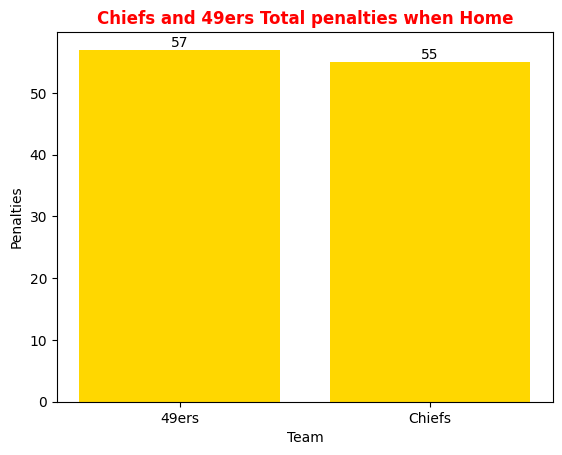

In [ ]:
#Created a dataframe with only Chiefs and 49ers home games from 2023 season
combined_df_home= pd.concat([filtered_dates_KCH,filtered_dates_SFH], ignore_index=True)

#Added total penalties of each game to calcuate total penalties for each team
team_penalties_home= combined_df_home.groupby('home')['pen_num_home'].sum()

#Made a bar graph to show total turnovers from Chiefs and 49ers during Home games
plt.bar(team_penalties_home.index, team_penalties_home.values, color='gold')

plt.title('Chiefs and 49ers Total penalties when Home', fontsize=12, fontweight='bold', color='red')
plt.xlabel('Team')
plt.ylabel('Penalties')

for i, value in enumerate(team_penalties_home.values):
    plt.text(i, value + 0.5, str(value), ha='center')
plt.show()

In [ ]:
#Calculated Chiefs mean and STDV of points scored, mean and STDV of total penalties and mean and STDV of Turnovers when Home and Away
mean_away_KC= filtered_dates_KCA.score_away.mean()

mean_home_KC=filtered_dates_KCH.score_home.mean()

sd_away_KC=filtered_dates_KCA.score_away.std()

sd_home_KC = filtered_dates_KCH.score_home.std()

opp_mean_score_away_KC=filtered_dates_KCA.score_home.mean()

opp_mean_score_home_KC=filtered_dates_KCH.score_away.mean()

opp_sd_score_away_KC=filtered_dates_KCA.score_home.std()

opp_sd_score_home_KC= filtered_dates_KCH.score_away.std()

mean_away_pens_KC = filtered_dates_KCA.pen_num_away.mean()

mean_home_pens_KC=filtered_dates_KCH.pen_num_home.mean()

sd_away_pens_KC=filtered_dates_KCA.pen_num_away.std()

sd_home_pens_KC= filtered_dates_KCH.pen_num_home.std()

total_turnovers_away_KC = filtered_dates_KCA[['fumbles_away', 'interceptions_away']].sum(axis=1)

total_turnovers_home_KC= filtered_dates_KCH[['fumbles_home', 'interceptions_home']].sum(axis=1)

mean_total_turnovers_away_KC = total_turnovers_away_KC.mean()

mean_total_turnovers_home_KC = total_turnovers_home_KC.mean()

sd_total_turnovers_away_KC = total_turnovers_away_KC.std()

sd_total_turnovers_home_KC = total_turnovers_home_KC.std()

print("Chiefs Away Points Mean:",mean_away_KC)
print("Chiefs Home Points Mean:",mean_home_KC)
print("Chiefs Away Points STD Dev:",sd_away_KC)
print("Chiefs Home Points STD Dev:",sd_away_KC)

print("Chiefs Away Points Allowed Mean:",opp_mean_score_away_KC)
print("Chiefs Home Points Allowed Mean:",opp_mean_score_home_KC)
print("Chiefs Away Points Allowed STD Dev:",opp_sd_score_away_KC)
print("Chiefs Home Points Allowed STD Dev:",opp_sd_score_home_KC)

print("Chiefs Away Penalties Mean:",mean_away_pens_KC)
print("Chiefs Home Penalties Mean:",mean_home_pens_KC)
print("Chiefs Away Penalties STD Dev:",sd_away_pens_KC)
print("Chiefs Home Penalties STD Dev:",sd_away_pens_KC)

print("Chiefs Away Turnovers Mean:",mean_total_turnovers_away_KC)
print("Chiefs Home Turnovers Mean:",mean_total_turnovers_home_KC)
print("Chiefs Away Turnovers STD Dev:",sd_total_turnovers_away_KC)
print("Chiefs Home Turnovers STD Dev:",sd_total_turnovers_away_KC)

Chiefs Away Points Mean: 21.0
Chiefs Home Points Mean: 23.1
Chiefs Away Points STD Dev: 7.118052168020874
Chiefs Home Points STD Dev: 7.118052168020874
Chiefs Away Points Allowed Mean: 18.0
Chiefs Home Points Allowed Mean: 15.5
Chiefs Away Points Allowed STD Dev: 6.182412330330469
Chiefs Home Points Allowed STD Dev: 5.441609239104836
Chiefs Away Penalties Mean: 5.1
Chiefs Home Penalties Mean: 5.5
Chiefs Away Penalties STD Dev: 3.3482997343593826
Chiefs Home Penalties STD Dev: 3.3482997343593826
Chiefs Away Turnovers Mean: 1.5
Chiefs Home Turnovers Mean: 1.5
Chiefs Away Turnovers STD Dev: 1.5811388300841898
Chiefs Home Turnovers STD Dev: 1.5811388300841898


In [ ]:
#Calculated 49ers mean and STDV of points scored, mean and STDV of total penalties and mean and STDV of Turnovers when Home and Away
mean_away_SF= filtered_dates_SFA.score_away.mean()

mean_home_SF=filtered_dates_SFH.score_home.mean()

sd_away_SF=filtered_dates_SFA.score_away.std()

sd_home_SF= filtered_dates_SFH.score_home.std()

opp_mean_score_away_SF=filtered_dates_SFA.score_home.mean()

opp_mean_score_home_SF=filtered_dates_SFH.score_away.mean()

opp_sd_score_away_SF=filtered_dates_SFA.score_home.std()

opp_sd_score_home_SF=filtered_dates_SFH.score_away.std()

mean_away_pens_SF= filtered_dates_SFA.pen_num_away.mean()

mean_home_pens_SF=filtered_dates_SFH.pen_num_home.mean()

sd_away_pens_SF=filtered_dates_SFA.pen_num_away.std()

sd_home_pens_SF= filtered_dates_SFH.pen_num_home.std()

total_turnovers_away_SF = filtered_dates_SFA[['fumbles_away', 'interceptions_away']].sum(axis=1)
total_turnovers_home_SF= filtered_dates_SFH[['fumbles_home', 'interceptions_home']].sum(axis=1)

mean_total_turnovers_away_SF = total_turnovers_away_SF.mean()

mean_total_turnovers_home_SF = total_turnovers_home_SF.mean()

sd_total_turnovers_away_SF = total_turnovers_away_SF.std()

sd_total_turnovers_home_SF = total_turnovers_home_SF.std()

print("49ers Away Points Mean:",mean_away_SF)
print("49ers Home Points Mean:",mean_home_SF)
print("49ers Away Points STD Dev:",sd_away_SF)
print("49ers Home Points STD Dev:",sd_away_SF)

print("49ers Away Points Allowed Mean:",opp_mean_score_away_SF)
print("49ers Home Points Allowed Mean:",opp_mean_score_home_SF)
print("49ers Away Points Allowed STD Dev:",opp_sd_score_away_SF)
print("49ers Home Points Allowed STD Dev:",opp_sd_score_home_SF)

print("49ers Away Penalties Mean:",mean_away_pens_SF)
print("49ers Home Penalties Mean:",mean_home_pens_SF)
print("49ers Away Penalties STD Dev:",sd_away_pens_SF)
print("49ers Home Penalties STD Dev:",sd_away_pens_SF)

print("49ers Away Turnovers Mean:",mean_total_turnovers_away_SF)
print("49ers Home Turnovers Mean:",mean_total_turnovers_home_SF)
print("49ers Away Turnovers STD Dev:",sd_total_turnovers_away_SF)
print("49ers Home Turnovers STD Dev:",sd_total_turnovers_away_SF)

49ers Away Points Mean: 30.333333333333332
49ers Home Points Mean: 27.6
49ers Away Points STD Dev: 9.565563234854496
49ers Home Points STD Dev: 9.565563234854496
49ers Away Points Allowed Mean: 16.11111111111111
49ers Home Points Allowed Mean: 20.5
49ers Away Points Allowed STD Dev: 8.417904199449595
49ers Home Points Allowed STD Dev: 8.449194570424384
49ers Away Penalties Mean: 5.888888888888889
49ers Home Penalties Mean: 5.7
49ers Away Penalties STD Dev: 3.655285366576885
49ers Home Penalties STD Dev: 3.655285366576885
49ers Away Turnovers Mean: 0.6666666666666666
49ers Home Turnovers Mean: 1.3
49ers Away Turnovers STD Dev: 1.0
49ers Home Turnovers STD Dev: 1.0


In [ ]:
#Calculated sum of Chris Jones
CJ_sacks_QbHits= CJ[['Sacks','QBHits']].sum(axis=1)
ChrisJones=float(CJ_sacks_QbHits)
Oline_penalties = Oline.iloc[3]['All Pen.']
print("Chris Jones Average Sacks and QB Hits Per Game:",ChrisJones/20)
print("49ers Interior O-Line Average Penalties Per Game:",Oline_penalties/19)

Chris Jones Average Sacks and QB Hits Per Game: 1.975
49ers Interior O-Line Average Penalties Per Game: 0.7894736842105263


In [ ]:
#Use dataset of only score and penalties to see how number of penalties (without yardage) impact the score
kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCA = kcdfa[(selected_date < kcdfa['date']) & (kcdfa['date'] < selected_date_2)]
print(filtered_dates_KCA[['score_away', 'score_home','pen_num_away','pen_num_home']])

kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCH = kcdfh[(selected_date < kcdfh['date']) & (kcdfh['date'] < selected_date_2)]
print(filtered_dates_KCH[['score_away', 'score_home','pen_num_away','pen_num_home']])

Sfdfa['date'] = Sfdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFA = Sfdfa[(selected_date < Sfdfa['date']) & (Sfdfa['date'] < selected_date_2)]
print(filtered_dates_SFA[['score_away', 'score_home','pen_num_away','pen_num_home']])

Sfdfh['date'] = Sfdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFH = Sfdfh[(selected_date < Sfdfh['date']) & (Sfdfh['date'] < selected_date_2)]
print(filtered_dates_SFH[['score_away', 'score_home','pen_num_away','pen_num_home']])

      score_away  score_home  pen_num_away  pen_num_home
5667          17           9            12             2
5706          23          20             5             7
5719          27          20            10             4
5762           9          24             5             6
5820          31          17             4             0
5835          19          27             5             7
5860          27          17             2             5
5912          13          12             3             1
5925          27          24             2             5
5926          17          10             3             8
      score_away  score_home  pen_num_away  pen_num_home
5644          21          20             4             3
5687          10          41             6             3
5722           8          19             3             7
5747          17          31             4             6
5767          14          21             6             9
5807          21          17   

<ipython-input-24-757bee625806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-24-757bee625806>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-24-757bee625806>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [ ]:
#Use dataset of only score and turnovers to see how turnovers impact the score
kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCA = kcdfa[(selected_date < kcdfa['date']) & (kcdfa['date'] < selected_date_2)]
print(filtered_dates_KCA[['score_away', 'score_home','fumbles_away','fumbles_home','interceptions_away','interceptions_home']])

kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCH = kcdfh[(selected_date < kcdfh['date']) & (kcdfh['date'] < selected_date_2)]
print(filtered_dates_KCH[['score_away', 'score_home','fumbles_away','fumbles_home','interceptions_away','interceptions_home']])

Sfdfa['date'] = Sfdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFA = Sfdfa[(selected_date < Sfdfa['date']) & (Sfdfa['date'] < selected_date_2)]
print(filtered_dates_SFA[['score_away', 'score_home','fumbles_away','fumbles_home','interceptions_away','interceptions_home']])

Sfdfh['date'] = Sfdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFH = Sfdfh[(selected_date < Sfdfh['date']) & (Sfdfh['date'] < selected_date_2)]
print(filtered_dates_SFH[['score_away', 'score_home','fumbles_away','fumbles_home','interceptions_away','interceptions_home']])

      score_away  score_home  fumbles_away  fumbles_home  interceptions_away  \
5667          17           9             2             1                   1   
5706          23          20             0             1                   2   
5719          27          20             0             1                   0   
5762           9          24             3             1                   2   
5820          31          17             0             0                   0   
5835          19          27             0             0                   1   
5860          27          17             0             0                   2   
5912          13          12             0             1                   1   
5925          27          24             1             0                   0   
5926          17          10             0             2                   0   

      interceptions_home  
5667                   0  
5706                   0  
5719                   0  
5762       

<ipython-input-25-9829ac29b82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-25-9829ac29b82d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-25-9829ac29b82d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [ ]:
#Use dataset of only score and sacks to see how sacks impact the score
kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCA = kcdfa[(selected_date < kcdfa['date']) & (kcdfa['date'] < selected_date_2)]
print(filtered_dates_KCA[['score_away', 'score_home','sacks_num_away','sacks_num_home']])

kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_KCH = kcdfh[(selected_date < kcdfh['date']) & (kcdfh['date'] < selected_date_2)]
print(filtered_dates_KCH[['score_away', 'score_home','sacks_num_away','sacks_num_home']])

Sfdfa['date'] = Sfdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFA = Sfdfa[(selected_date < Sfdfa['date']) & (Sfdfa['date'] < selected_date_2)]
print(filtered_dates_SFA[['score_away', 'score_home','sacks_num_away','sacks_num_home']])

Sfdfh['date'] = Sfdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
selected_date = pd.to_datetime('20230212', format='%Y%m%d', errors='ignore')
selected_date_2= pd.to_datetime('20240211',format='%Y%m%d', errors='ignore')
filtered_dates_SFH = Sfdfh[(selected_date < Sfdfh['date']) & (Sfdfh['date'] < selected_date_2)]
print(filtered_dates_SFH[['score_away', 'score_home','sacks_num_away','sacks_num_home']])

      score_away  score_home  sacks_num_away  sacks_num_home
5667          17           9               1               4
5706          23          20               1               2
5719          27          20               2               3
5762           9          24               3               6
5820          31          17               1               1
5835          19          27               3               2
5860          27          17               3               4
5912          13          12               1               3
5925          27          24               0               0
5926          17          10               2               4
      score_away  score_home  sacks_num_away  sacks_num_home
5644          21          20               1               0
5687          10          41               3               0
5722           8          19               4               2
5747          17          31               5               1
5767          14        

<ipython-input-26-e132c81cd2b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfa['date'] = kcdfa['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-26-e132c81cd2b4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kcdfh['date'] = kcdfh['date'].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
<ipython-input-26-e132c81cd2b4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [ ]:
#Created a function and implemented all the data I collected to create a simulator
def gameSim():
  #Calculated how many points are lost from turnovers,penalties, and sacks from dataframes above
  points_lost_per_turnover=4.49
  points_lost_per_penalty=3.5
  points_lost_per_sack=0.12

  #Calculated impact Chris Jones has and impact the 49ers interior Oline has on points scored
  CJ_impact= ChrisJones * points_lost_per_sack
  Oline_penalties_impact= Oline_penalties * points_lost_per_sack

   #randomly sampled average points scored, points allowed, turnovers, penalties and stdv of points scored, points allowed, turnovers and penalties when Chiefs and 49ers are home/away
  Chiefs_Score_Away=(rnd.gauss(mean_away_KC,sd_away_KC) + rnd.gauss(opp_mean_score_away_SF, opp_sd_score_away_SF))/2

  Chiefs_Score_Home=(rnd.gauss(mean_home_KC,sd_home_KC) + rnd.gauss(opp_mean_score_home_SF, opp_sd_score_home_SF))/2

  SanFran_Score_Away=(rnd.gauss(mean_away_SF,sd_away_SF) + rnd.gauss(opp_mean_score_away_KC, opp_sd_score_away_KC))/2

  SanFran_Score_Home=(rnd.gauss(mean_home_SF,sd_home_SF) + rnd.gauss(opp_mean_score_home_KC, opp_sd_score_home_KC))/2

  Chiefs_Turnovers_Away=(rnd.gauss(mean_total_turnovers_away_KC, sd_total_turnovers_away_KC))
  Chiefs_Turnovers_Home= (rnd.gauss(mean_total_turnovers_home_KC, sd_total_turnovers_home_KC))
  Chiefs_Penalties_Away=(rnd.gauss(mean_away_pens_KC, sd_away_pens_KC))
  Chiefs_Penalties_Home=(rnd.gauss(mean_home_pens_KC, sd_home_pens_KC))

  Chiefs_Turnovers=(Chiefs_Turnovers_Away + Chiefs_Turnovers_Home)/2
  Chiefs_Penalties=(Chiefs_Penalties_Away + Chiefs_Penalties_Home)/2

  #Adjusted Chiefs score based on impact of turnovers, and penalties
  Chiefs_Adjusted_Score=(Chiefs_Score_Away + Chiefs_Score_Home) - (Chiefs_Turnovers * points_lost_per_turnover) - (Chiefs_Penalties * points_lost_per_penalty)

  SanFran_Turnovers_Away=(rnd.gauss(mean_total_turnovers_away_SF, sd_total_turnovers_away_SF))
  SanFran_Turnovers_Home= (rnd.gauss(mean_total_turnovers_home_SF, sd_total_turnovers_home_SF))
  SanFran_Penalties_Away=(rnd.gauss(mean_away_pens_SF, sd_away_pens_SF))
  SanFran_Penalties_Home=(rnd.gauss(mean_home_pens_SF, sd_home_pens_SF))

  SanFran_Turnovers=(SanFran_Turnovers_Away + SanFran_Turnovers_Home)/2
  SanFran_Penalties=(SanFran_Penalties_Away + SanFran_Penalties_Home)/2
  #Adjusted 49ers score based on impact of turnovers, penalties, Chris Jones sacks/QB hits, and interior Oline penalties
  SanFran_Adjusted_Score=(SanFran_Score_Away + SanFran_Score_Home) - (SanFran_Turnovers * points_lost_per_turnover) - (SanFran_Penalties * points_lost_per_penalty) - CJ_impact - Oline_penalties_impact



  if int(round(Chiefs_Adjusted_Score)) > int(round(SanFran_Adjusted_Score)):
    return 1
  elif int(round(Chiefs_Adjusted_Score)) < int(round(SanFran_Adjusted_Score)):
    return -1
  else: return 0


In [ ]:
#Tested the Simulator
gameSim()

1

In [ ]:
#Calculated the percentage of wins for each team based on the simulation results
def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1
        elif gm == -1:
            team2win +=1
    print('Cheifs Win ', team1win/(team1win+team2win),'%')
    print('49ers Win', team2win/(team1win+team2win),'%')
    return gamesout

In [ ]:
gamesSim(100)

Cheifs Win  0.41237113402061853 %
49ers Win 0.5876288659793815 %


[1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1]